In [ ]:
image_path = '/content/Assignment-main/Data Visualization/images'
json_path = '/content/Assignment-main/Data Visualization/data'
alpha = 0.5

In [ ]:
import os
from IPython.display import Image
import json
from google.colab.patches import cv2_imshow
import numpy as np
import cv2
import random

In [ ]:
def get_denormalized_cordinates(data_path):
  denormalized_points = []
  data = open(data_path)
  info = json.load(data)
  for i in info:
    if(i['type']=="polygonlabels"):
      points = i['value']['points']
      width = i['original_width']
      height = i['original_height']
      for j in range(np.shape(points)[0]):
        points[j][0] = points[j][0]*width/100
        points[j][1] = points[j][1]*height/100
      # print(points)
      carpart = i['value']['polygonlabels']
      # print(carpart)
      temp = {}
      temp['part'] = carpart
      temp['points'] = points
      denormalized_points.append(temp)
  data.close()
  return denormalized_points

In [ ]:
def mark(img_path,data_path,alpha):
  points = get_denormalized_cordinates(data_path)
  image = cv2.imread(img_path)
  width = np.shape(image)[0]
  height = np.shape(image)[1]
  output = image.copy()
  for i in points:
    overlay = output.copy()
    r = random.randint(0,255)
    g = random.randint(0,255)
    b = random.randint(0,255)
    color = (r,g,b)
    corner = i['points']
    corner = np.asarray(corner,dtype=np.int32)
    corner.reshape((-1,1,2))
    overlay = cv2.fillPoly(overlay,[corner],color)
    cv2.addWeighted(overlay, alpha, output, 1 - alpha,0, output)
    output = cv2.polylines(output,[corner],True,color,1)
    temp = np.zeros((width,height,3),np.uint8)
    temp = cv2.fillPoly(temp,[corner],(255,0,0))
    gray=cv2.cvtColor(temp,cv2.COLOR_BGR2GRAY)
    contours, hierarchy = cv2.findContours(gray,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)[-2:]
    for cnt in contours:
      x,y,w,h = cv2.boundingRect(cnt)
    output = cv2.rectangle(output,(x,y),(x+w,y+h),color,1)
    output = cv2.putText(output, i['part'][0], (x,y), cv2.FONT_HERSHEY_SIMPLEX, 0.3, (0,0,0), 1, cv2.LINE_AA)
  return output

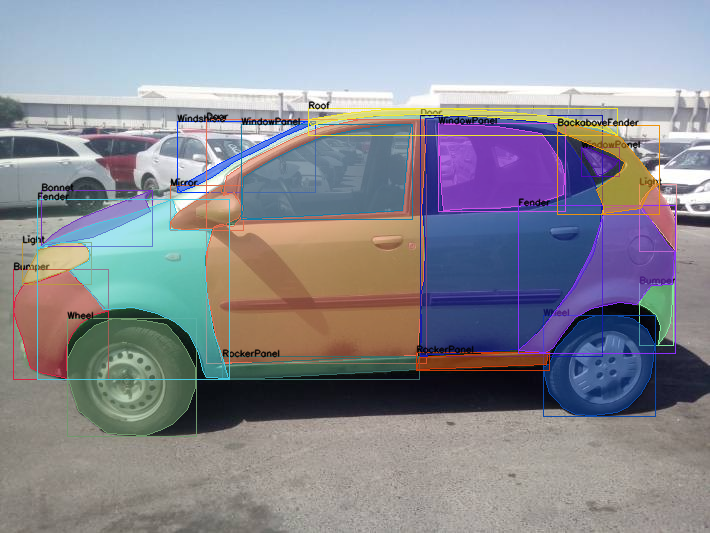

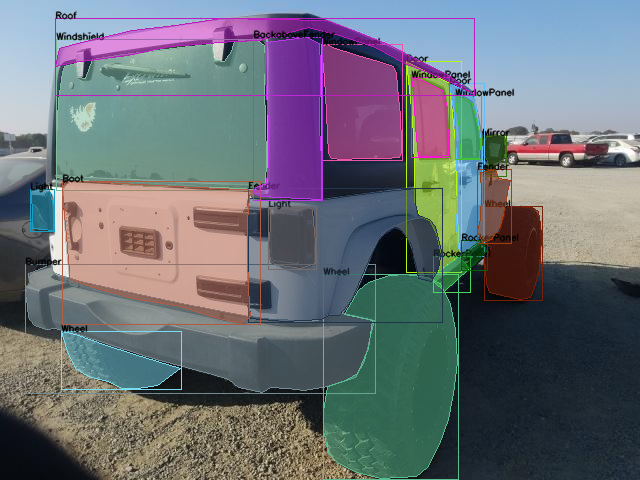

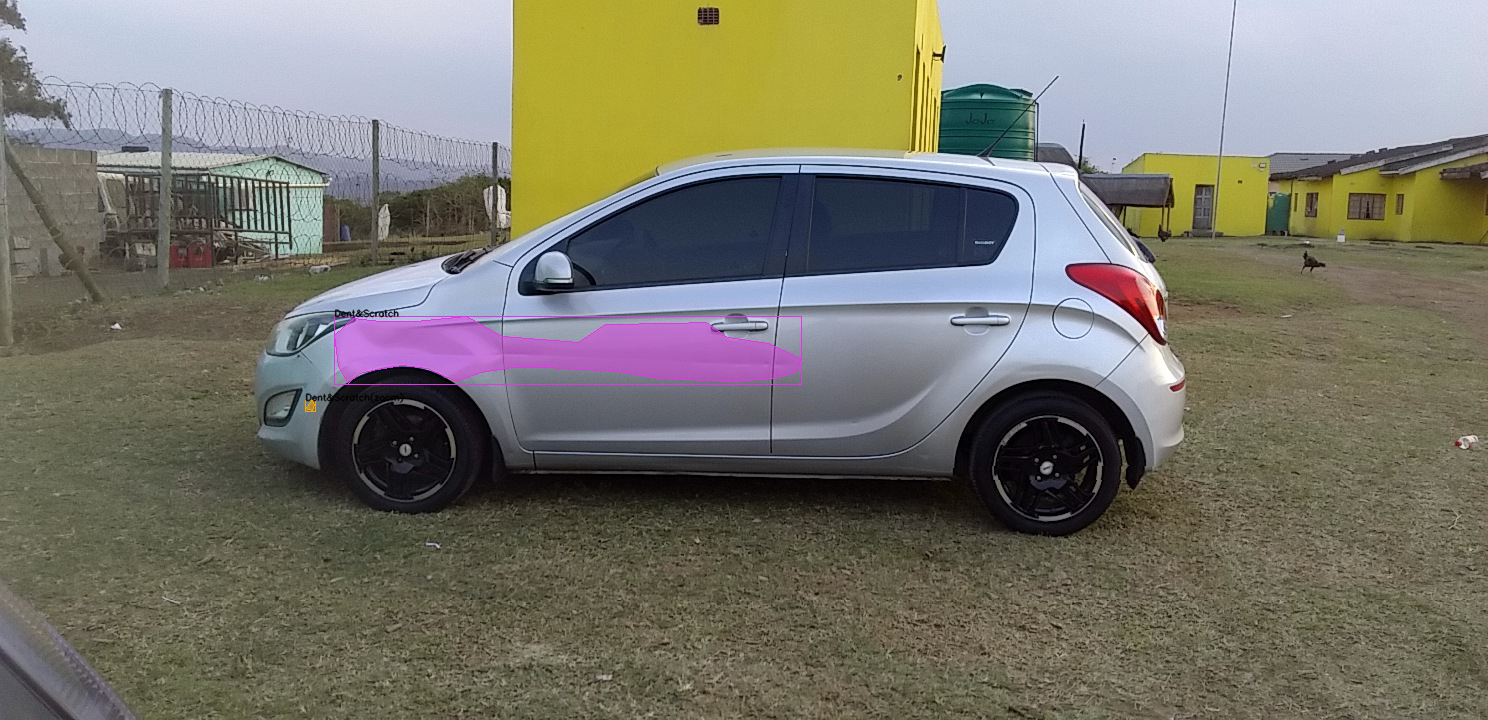

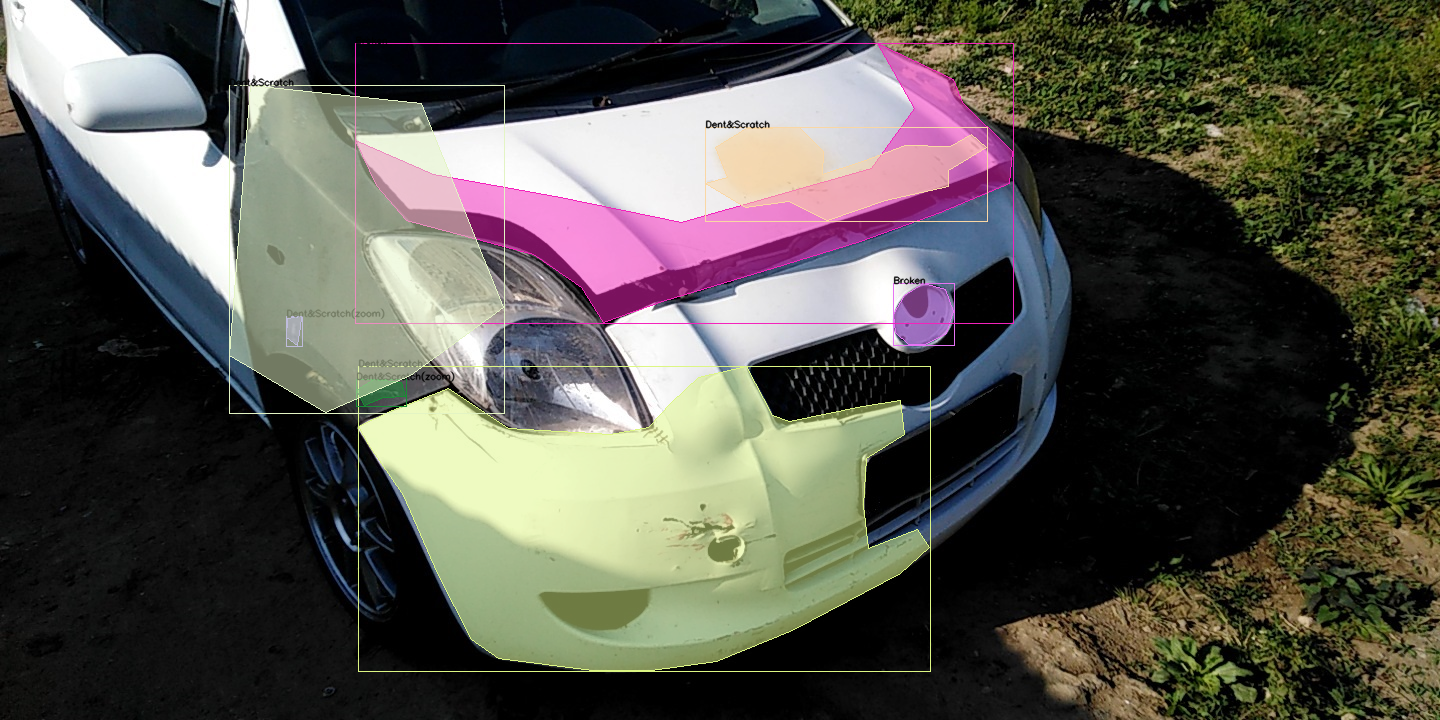

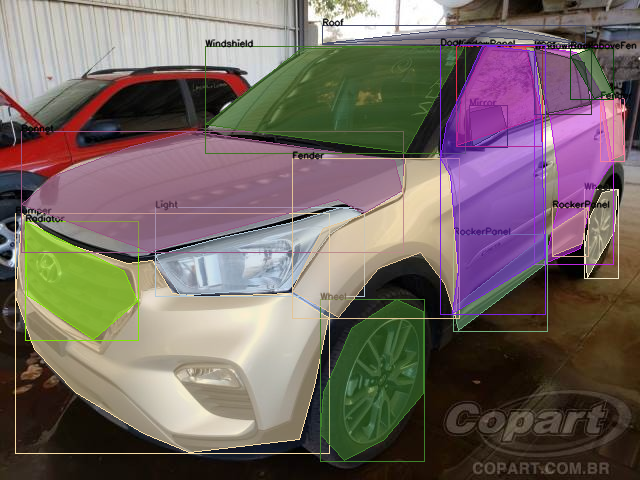

In [ ]:
for i in range(len(os.listdir(image_path))):
  subpath1 = str(i+1) + ".jpg"
  subpath2 = str(i+1) + ".json"
  img_path = os.path.join(image_path,subpath1)
  data_path = os.path.join(json_path,subpath2)
  output = mark(img_path,data_path,alpha)
  cv2_imshow(output)

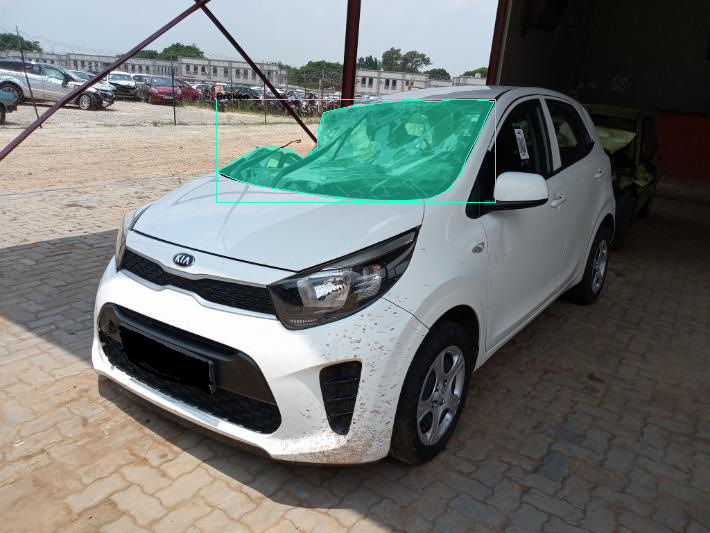

In [ ]:
cv2_imshow(mark('/content/Assignment-main/Damage Identification/images/5.jpg','/content/Assignment-main/Damage Identification/data/5-damages.json',0.5))